 # Evaluate the model performance


- semantic-level similarity (METEOR and BERTScore)
- word and sequence level overlap (BLEU and ROUGE scores)
- human evaluation


Explanations for the evaluation scores

- Average BERTScore

BERTScore is a metric used to measure the semantic similarity between generated text and reference text. It utilizes a pre-trained BERT model to encode sentences and computes similarity scores between them.

- Average METEOR Score

The METEOR score is another metric for assessing machine translation quality, considering both word-level alignment and sentence-level semantic similarity.

- Average BLEU Score

BLEU is a commonly used metric for machine translation evaluation. It evaluates translation quality by calculating the exact matching of n-grams in the generated text with those in the reference text, though it may overlook semantic similarity at the sentence level.

- Average Rouge Score

ROUGE scores are used to evaluate the overlap between generated text and reference text, including both word-level and sentence-level overlap. Here, the average scores for three ROUGE metrics are provided:

rouge-1: Indicates the overlap between individual words generated by the model and those in the reference text.

rouge-2: Reflects the overlap between phrases composed of two words generated by the model and those in the reference text.

rouge-l: Represents the length of the longest common subsequence between the text generated by the model and the reference text, i.e., the overlap at the sentence level.

In summary, METEOR and BERTScore focus on evaluating semantic-level similarity, whereas BLEU and ROUGE primarily assess overlap at the word and sequence levels.

### Evaluate

For evaluation, connected to L4 GPU in Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')   # connect to gdrive

Mounted at /content/gdrive


In [ ]:
pip install nltk bert-score rouge-score jieba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached 

In [4]:
# Change working directory to be current folder
import os
os.chdir('/content/gdrive/MyDrive/ISS/5005/finetuning')

1) Evaluate the finetuned qwen-7b-chat inference results

In [5]:
import pandas as pd
df_base = pd.read_json('./prediction_base.json',lines = True)

In [10]:
df_qwen = pd.read_json('./prediction_finetune.json',lines = True)
df_baichuan = pd.read_json('./prediction_baichuan.json',lines = True)

In [40]:
sample = df_base.loc[6]
print('Question:\n', sample['ask'])
print('\nGround truth:\n', sample['answer'])
print('\nGenerated answer:\n',sample['prediction_base'])

Question:
 女宝宝，才5岁，这几天，孩子说自己耳朵疼，早上，耳屎很多很黄，而且，伴有一些低烧，请问：小孩儿中耳炎耳朵疼痛该怎样诊治。

Ground truth:
 想较好的治疗中耳炎，可以在医生的指导下对症的选择一些有消炎作用的药物，如果孩子情况比较严重的话也可配合一些局部治疗，比如消炎型的滴耳剂，如果耳痛的情况比较严重的话可适当给予一些镇痛药，孩子要是伴有发烧家长可以给孩子给予一些有退烧的药物或者马上送孩子去医院，中耳炎是具有反复发作的特征的，如果存在耳膜穿孔的情况，是需要及时的去进行医治的，治疗期间还要注意保持饮食卫生，以及足够的休息时间。

Generated answer:
 鉴于您描述的症状，可能是儿童中耳炎。建议尽快带孩子去医院就诊，由专业医生进行诊断和治疗。同时，可以给孩子使用一些止痛药来缓解疼痛。但是请注意，这些都只是暂时的措施，最终还需要医生的专业指导。


In [42]:
sample['ask']

'女宝宝，才5岁，这几天，孩子说自己耳朵疼，早上，耳屎很多很黄，而且，伴有一些低烧，请问：小孩儿中耳炎耳朵疼痛该怎样诊治。'

In [43]:
sample['answer']

'想较好的治疗中耳炎，可以在医生的指导下对症的选择一些有消炎作用的药物，如果孩子情况比较严重的话也可配合一些局部治疗，比如消炎型的滴耳剂，如果耳痛的情况比较严重的话可适当给予一些镇痛药，孩子要是伴有发烧家长可以给孩子给予一些有退烧的药物或者马上送孩子去医院，中耳炎是具有反复发作的特征的，如果存在耳膜穿孔的情况，是需要及时的去进行医治的，治疗期间还要注意保持饮食卫生，以及足够的休息时间。'

In [44]:
sample['prediction_base']

'鉴于您描述的症状，可能是儿童中耳炎。建议尽快带孩子去医院就诊，由专业医生进行诊断和治疗。同时，可以给孩子使用一些止痛药来缓解疼痛。但是请注意，这些都只是暂时的措施，最终还需要医生的专业指导。'

In [41]:
df_qwen.loc[6]['prediction_finetune']

'建议家长可以在医生的指导下选择适合的抗生素或是消炎药给孩子使用，可缓解炎症症状，服用药物的同时还可以进行一些局部治疗，如消炎类型的滴耳剂，孩子如果耳朵比较疼的话也适量情给一些镇痛的药物，要是伴随发高烧的情况，那么根据孩子的症状使用药物，严重的情况请尽快去医院进行救治，除了这些药物治疗的方法之外，如果孩子情况严重出现耳膜穿孔是需要去医院进行手术治疗的，病情好转后建议带孩子适当运动，提高免疫力，以防止再次病发。'

In [27]:
df_baichuan.loc[3]['prediction_baichuan']

'回答：你好，根据你描述的情况看来癫痫病是大脑异常脉冲所致使的突发性活动性疾病，以复发性活动、意识丧失和肌肉抽搐为主要特征，需要有积极治疗，一般癫痫发作时，需要有的患者家人及时抱括药物控制等，防止意外再次发生，平时注意患者安全，防止高空坠跌，水边游泳，暴饮暴食等，\n'

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_base

In [ ]:
import jieba

def chinese_tokenizer(text):
    return list(jieba.cut(text))

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from nltk.translate.meteor_score import meteor_score

def calculate_bleu(ref, cand):
    reference = [chinese_tokenizer(ref)]
    candidate = chinese_tokenizer(cand)
    smoothie = SmoothingFunction().method1
    return sentence_bleu(reference, candidate, smoothing_function=smoothie)



def calculate_rouge(ref, cand):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=False)
    scores = scorer.score(ref, cand)
    return scores['rouge1'].fmeasure, scores['rouge2'].fmeasure, scores['rougeL'].fmeasure



def calculate_bertscore(refs, cands):
    P, R, F1 = bert_score([" ".join(chinese_tokenizer(ref)) for ref in refs], [" ".join(chinese_tokenizer(cand)) for cand in cands], lang="zh")
    return F1.numpy().tolist()


def calculate_meteor(ref, cand):
    ref_tokens = [jieba.cut(ref)]
    cand_tokens = jieba.cut(cand)
    # 计算METEOR分数，注意输入是词列表
    score = meteor_score(ref_tokens, cand_tokens)
    return score


In [ ]:
df_base['BLEU'] = df_base.apply(lambda x: calculate_bleu(x['answer'], x['prediction_base']), axis=1)
df_base['ROUGE-1'], df_base['ROUGE-2'], df_base['ROUGE-L'] = zip(*df_base.apply(lambda x: calculate_rouge(x['answer'], x['prediction_base']), axis=1))
df_base['BERTScore'] = calculate_bertscore(df_base['answer'].tolist(), df_base['prediction_base'].tolist())
df_base['METEOR'] = df_base.apply(lambda x: calculate_meteor(x['answer'], x['prediction_base']), axis=1)

mean_bleu = df_base['BLEU'].mean()
mean_rouge1 = df_base['ROUGE-1'].mean()
mean_rouge2 = df_base['ROUGE-2'].mean()
mean_rougel = df_base['ROUGE-L'].mean()
mean_bertscore = df_base['BERTScore'].mean()
mean_meteor = df_base['METEOR'].mean()

print("Average BLEU Score:", mean_bleu)
print("Average ROUGE-1 Score:", mean_rouge1)
print("Average ROUGE-2 Score:", mean_rouge2)
print("Average ROUGE-L Score:", mean_rougel)
print("Average BERTScore:", mean_bertscore)
print("Average METEOR Score:", mean_meteor)
#["BERTScore(F1)", "METEOR", "BLEU", "rouge-1", "rouge-2", "rouge-l"]

df_base_score = [mean_bertscore,mean_meteor,mean_bleu,mean_rouge1,mean_rouge2,mean_rougel]
# df_base_score.append(mean_bertscore,mean_meteor,mean_bleu,mean_rouge1,mean_rouge2,mean_rougel)
print(df_base_score)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.777 seconds.
DEBUG:jieba:Loading model cost 0.777 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

Average BLEU Score: 0.018925168324518373
Average ROUGE-1 Score: 0.008061327561327563
Average ROUGE-2 Score: 0.0018888888888888887
Average ROUGE-L Score: 0.00783910533910534
Average BERTScore: 0.589221192419529
Average METEOR Score: 0.11041280823034606
[0.589221192419529, 0.11041280823034606, 0.018925168324518373, 0.008061327561327563, 0.0018888888888888887, 0.00783910533910534]


In [ ]:
import pandas as pd
df_qwen = pd.read_json('./prediction_finetune.json',lines = True)
df_qwen['BLEU'] = df_qwen.apply(lambda x: calculate_bleu(x['answer'], x['prediction_finetune']), axis=1)
df_qwen['ROUGE-1'], df_qwen['ROUGE-2'], df_qwen['ROUGE-L'] = zip(*df_qwen.apply(lambda x: calculate_rouge(x['answer'], x['prediction_finetune']), axis=1))
df_qwen['BERTScore'] = calculate_bertscore(df_qwen['answer'].tolist(), df_qwen['prediction_finetune'].tolist())
df_qwen['METEOR'] = df_qwen.apply(lambda x: calculate_meteor(x['answer'], x['prediction_finetune']), axis=1)

mean_bleu = df_qwen['BLEU'].mean()
mean_rouge1 = df_qwen['ROUGE-1'].mean()
mean_rouge2 = df_qwen['ROUGE-2'].mean()
mean_rougel = df_qwen['ROUGE-L'].mean()
mean_bertscore = df_qwen['BERTScore'].mean()
mean_meteor = df_qwen['METEOR'].mean()

print("Average BLEU Score:", mean_bleu)
print("Average ROUGE-1 Score:", mean_rouge1)
print("Average ROUGE-2 Score:", mean_rouge2)
print("Average ROUGE-L Score:", mean_rougel)
print("Average BERTScore:", mean_bertscore)
print("Average METEOR Score:", mean_meteor)
#["BERTScore(F1)", "METEOR", "BLEU", "rouge-1", "rouge-2", "rouge-l"]
df_qwen_score = [mean_bertscore,mean_meteor,mean_bleu,mean_rouge1,mean_rouge2,mean_rougel]
print(df_qwen_score)

Average BLEU Score: 0.1937966234488257
Average ROUGE-1 Score: 0.017888095238095238
Average ROUGE-2 Score: 0.00425
Average ROUGE-L Score: 0.017888095238095238
Average BERTScore: 0.8454873230457306
Average METEOR Score: 0.5797801038009975
[0.8454873230457306, 0.5797801038009975, 0.1937966234488257, 0.017888095238095238, 0.00425, 0.017888095238095238]


In [ ]:
import pandas as pd
df_baichuan = pd.read_json('./prediction_baichuan.json',lines = True)
df_baichuan['BLEU'] = df_baichuan.apply(lambda x: calculate_bleu(x['answer'], x['prediction_baichuan']), axis=1)
df_baichuan['ROUGE-1'], df_baichuan['ROUGE-2'], df_baichuan['ROUGE-L'] = zip(*df_baichuan.apply(lambda x: calculate_rouge(x['answer'], x['prediction_baichuan']), axis=1))
df_baichuan['BERTScore'] = calculate_bertscore(df_baichuan['answer'].tolist(), df_baichuan['prediction_baichuan'].tolist())
df_baichuan['METEOR'] = df_baichuan.apply(lambda x: calculate_meteor(x['answer'], x['prediction_baichuan']), axis=1)

mean_bleu = df_baichuan['BLEU'].mean()
mean_rouge1 = df_baichuan['ROUGE-1'].mean()
mean_rouge2 = df_baichuan['ROUGE-2'].mean()
mean_rougel = df_baichuan['ROUGE-L'].mean()
mean_bertscore = df_baichuan['BERTScore'].mean()
mean_meteor = df_baichuan['METEOR'].mean()

print("Average BLEU Score:", mean_bleu)
print("Average ROUGE-1 Score:", mean_rouge1)
print("Average ROUGE-2 Score:", mean_rouge2)
print("Average ROUGE-L Score:", mean_rougel)
print("Average BERTScore:", mean_bertscore)
print("Average METEOR Score:", mean_meteor)
#["BERTScore(F1)", "METEOR", "BLEU", "rouge-1", "rouge-2", "rouge-l"]
df_baichuan_score = [mean_bertscore,mean_meteor,mean_bleu,mean_rouge1,mean_rouge2,mean_rougel]
print(df_baichuan_score)

Average BLEU Score: 0.10760979857311759
Average ROUGE-1 Score: 0.01945238095238095
Average ROUGE-2 Score: 0.005916666666666666
Average ROUGE-L Score: 0.01945238095238095
Average BERTScore: 0.7498732774555683
Average METEOR Score: 0.5337043304754088
[0.7498732774555683, 0.5337043304754088, 0.10760979857311759, 0.01945238095238095, 0.005916666666666666, 0.01945238095238095]


In [ ]:
from tabulate import tabulate

# Define the x-axis labels
labels = ["BERTScore(F1)", "METEOR", "BLEU", "rouge-1", "rouge-2", "rouge-l"]


base_qwen_scores = df_base_score

finetuned_qwen_scores = df_qwen_score

finetuned_baichuan_scores = df_baichuan_score
# Calculate improvement as percentage
improvement_qwen = [((finetuned - base)/base*10) for finetuned, base in zip(finetuned_qwen_scores, base_qwen_scores)]

# Create table headers
headers = ["Metric", "Base Qwen Score","Finetuned Qwen Score", "Finetuned Baichuan2 Score", "Improvement: Qwen finetuned vs base, %"]

# Combine data into a list of lists
data = zip(labels, base_qwen_scores, finetuned_qwen_scores,finetuned_baichuan_scores,improvement_qwen)

# Print the table
print(tabulate(data, headers=headers, floatfmt=".7f"))


Metric           Base Qwen Score    Finetuned Qwen Score    Finetuned Baichuan2 Score    Improvement: Qwen finetuned vs base, %
-------------  -----------------  ----------------------  ---------------------------  ----------------------------------------
BERTScore(F1)          0.5892212               0.8454873                    0.7498733                                 4.3492348
METEOR                 0.1104128               0.5797801                    0.5337043                                42.5102217
BLEU                   0.0189252               0.1937966                    0.1076098                                92.4015322
rouge-1                0.0080613               0.0178881                    0.0194524                                12.1900116
rouge-2                0.0018889               0.0042500                    0.0059167                                12.5000000
rouge-l                0.0078391               0.0178881                    0.0194524                   

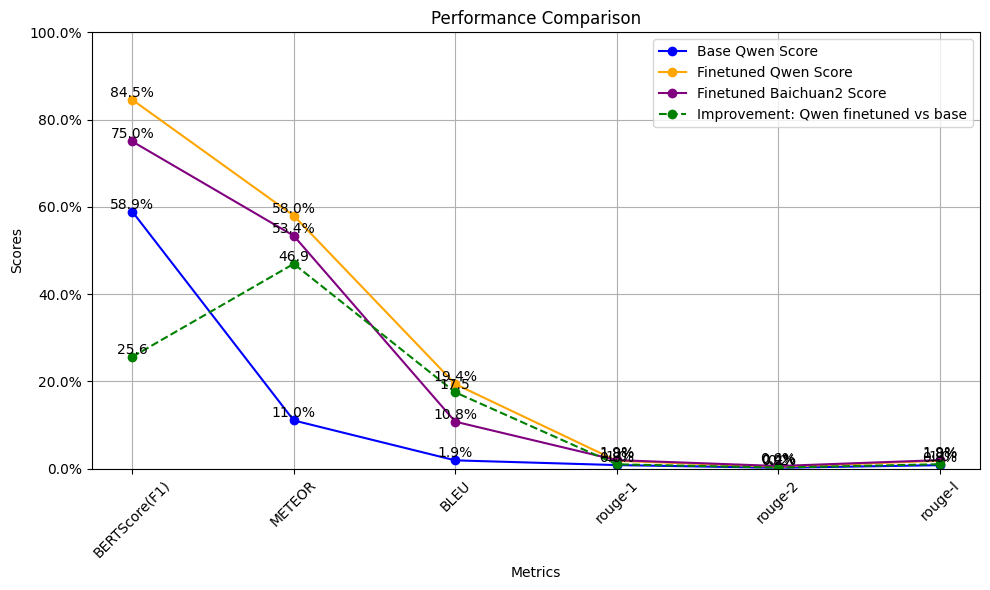

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to format y-axis labels as percentages
def percent(x, pos):
    return '%1.1f%%' % (x * 100)

# Define the x-axis labels
labels = ["BERTScore(F1)", "METEOR", "BLEU", "rouge-1", "rouge-2", "rouge-l"]

# Extract scores for finetuned llama2-7b-chat model
# finetuned_llama2_scores = np.array([0.9171436856389046, 0.5474461102655611, 0.22939051090323534, 0.5326981310578925, 0.3065083438932236, 0.5008402663761499])

# # Extract scores for base llama2-7b-chat model
# base_llama2_scores = np.array([0.8943092213273048, 0.4443633704095649, 0.13634204780069573, 0.4246577955218664, 0.19931899333659336, 0.39204521176654894])

# # Extract scores for base llama3-8b-instruct model
# base_llama3_scores = np.array([0.9078916269540787, 0.4930108157554961, 0.1820904754376296, 0.4846081690050024,  0.25759552198048974, 0.44522714796918544])


# # Calculate improvement as percentage
# improvement_llama2 = ((finetuned_llama2_scores - base_llama2_scores) / base_llama2_scores)

base_qwen_scores = df_base_score

finetuned_qwen_scores = df_qwen_score

finetuned_baichuan_scores = df_baichuan_score
# Calculate improvement as percentage
improvement_qwen = [((finetuned - base)) for finetuned, base in zip(finetuned_qwen_scores, base_qwen_scores)]


# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(labels, base_qwen_scores, marker='o', color='blue',label='Base Qwen Score')
plt.plot(labels, finetuned_qwen_scores, marker='o', color='orange',label='Finetuned Qwen Score')
plt.plot(labels, finetuned_baichuan_scores, marker='o', color='purple',label='Finetuned Baichuan2 Score')
plt.plot(labels, improvement_qwen, marker='o', color='green', linestyle='--', label='Improvement: Qwen finetuned vs base')
plt.title('Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis tick labels as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(percent))

# Set y-axis limit to represent 100%
plt.ylim(0, 1)

# Add labels for each point on Finetuned llama2 Model line
for i in range(len(labels)):
    plt.text(labels[i], base_qwen_scores[i], f'{base_qwen_scores[i]*100:.1f}%', ha='center', va='bottom')

# Add labels for each point on Base llama2 Model line
for i in range(len(labels)):
    plt.text(labels[i], finetuned_qwen_scores[i], f'{finetuned_qwen_scores[i]*100:.1f}%', ha='center', va='bottom')

# Add labels for each point on Base llama3 Model line
for i in range(len(labels)):
    plt.text(labels[i], finetuned_baichuan_scores[i], f'{finetuned_baichuan_scores[i]*100:.1f}%', ha='center', va='bottom')


# Add labels for each point on Improvement line
for i in range(len(labels)):
    plt.text(labels[i], improvement_qwen[i], f'{improvement_qwen[i]*100:.1f}', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()



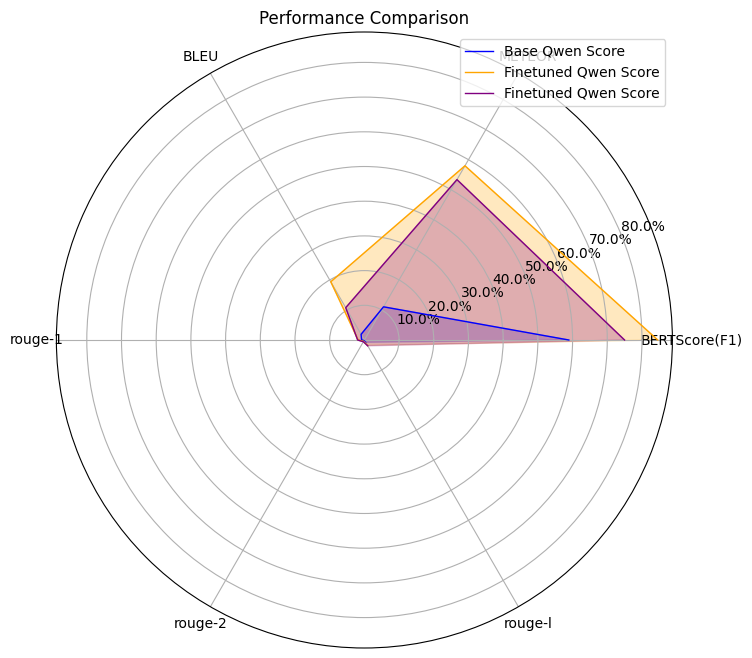

In [ ]:
# Alternatively, visualize in a radar chart

import matplotlib.pyplot as plt
import numpy as np

# Define the function to format y-axis labels as percentages
def percent(x, pos):
    return '%1.1f%%' % (x * 100)

# Define the x-axis labels
labels = ["BERTScore(F1)", "METEOR", "BLEU", "rouge-1", "rouge-2", "rouge-l"]

# Extract scores for finetuned llama2-7b-chat model
base_qwen_scores = df_base_score

finetuned_qwen_scores = df_qwen_score

finetuned_baichuan_scores = df_baichuan_score
# Calculate improvement as percentage

# Calculate the maximum possible score for each metric
max_scores = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

# Set up the radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the radar chart for each model
ax.plot(angles, base_qwen_scores, color='blue', linewidth=1, label='Base Qwen Score')
ax.fill(angles, base_qwen_scores, color='blue', alpha=0.25)
ax.plot(angles, finetuned_qwen_scores, color='orange', linewidth=1, label = 'Finetuned Qwen Score')
ax.fill(angles, finetuned_qwen_scores, color='orange', alpha=0.25)
ax.plot(angles, finetuned_baichuan_scores, color='purple', linewidth=1, label='Finetuned Qwen Score')
ax.fill(angles, finetuned_baichuan_scores, color='purple', alpha=0.25)

# Set the title and add a legend
plt.title('Performance Comparison')
plt.legend(loc='upper right')

# Set y-axis tick labels as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(percent))

# Set the radial axis labels
plt.xticks(angles, labels)

# Add a grid
plt.grid(True)

# Display the radar chart
plt.show()
